## Observations and Insights 

In [234]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "../Data/Mouse_metadata.csv"
study_results_path = "../Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Mouse_Study_Results = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
Mouse_Study_Results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [235]:
# Checking the number of mice.
# Another method for unique counts
#Mice_Count = Mouse_Study_Results["Mouse ID"].nunique()

Mice_Count = len(pd.unique(Mouse_Study_Results["Mouse ID"]))
Mice_Count

249

In [236]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Duplicate_Mice_ID = Mouse_Study_Results.loc[Mouse_Study_Results.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
Duplicate_Mice_ID

array(['g989'], dtype=object)

In [237]:
# Optional: Get all the data for the duplicate mouse ID. 

        

In [238]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Clean_df = Mouse_Study_Results[Mouse_Study_Results['Mouse ID'].isin(Duplicate_Mice_ID) == False]

Clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [239]:
# Checking the number of mice in the clean DataFrame.
Clean_count = Clean_df["Mouse ID"].nunique()

Clean_count


248

## Summary Statistics

In [240]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Clean_df['Drug Regimen'].describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).mean()
Median = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).median()
Var = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).var()
Std = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).std()
Sem = Clean_df['Tumor Volume (mm3)'].groupby(Clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.
Clean_Summary = pd.DataFrame({"Mean Tumor Volume": Mean, 
"Median Tumor Volume": Median, 
"Tumor Volume Variance": Var, 
"Tumor Volume Std. Dev.": Std,
"Tumor Volume Std. Err.": Sem})

Clean_Summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [241]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
Clean_Summary_Agg =  Clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
Clean_Summary_Agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Total number of Timepoints for each Drug')

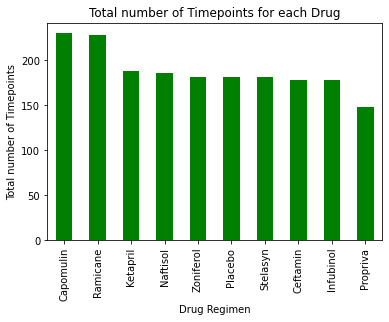

In [242]:
# Counting values to create chart.
DrugRegimen_Count = Clean_df["Drug Regimen"].value_counts()
DrugRegimen_Count

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
DrugRegimen_Count_Chart = DrugRegimen_Count.plot.bar(color='g')
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Timepoints")
plt.title("Total number of Timepoints for each Drug")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

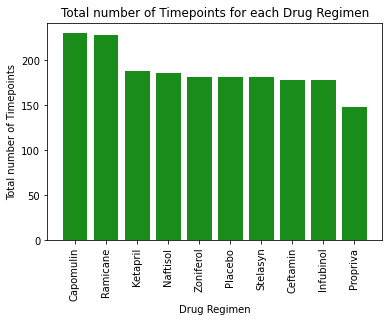

In [243]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = DrugRegimen_Count.index.values
y_axis = DrugRegimen_Count.values

plt.bar(x_axis, y_axis, color='g', alpha=0.9)

plt.title("Total number of Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Timepoints")
plt.xticks(rotation="vertical")


Text(0.5, 1.0, 'Female vs. Male Mice')

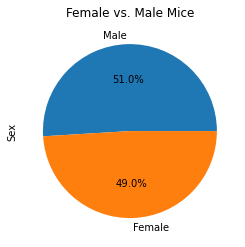

In [244]:
# Counting values to create chart.
Gender_Count = Clean_df['Sex'].value_counts()
Gender_Count

# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender_Count_Chart = Gender_Count.plot.pie(autopct="%1.1f%%")
Gender_Count_Chart
plt.title("Female vs. Male Mice")


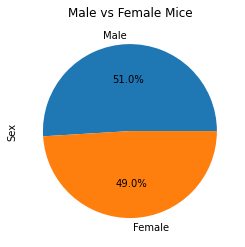

In [245]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = Gender_Count.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [246]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = Clean_df.loc[Clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane = Clean_df.loc[Clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol = Clean_df.loc[Clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin = Clean_df.loc[Clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_Greatest = pd.DataFrame(Capomulin.groupby('Mouse ID').max()['Timepoint'])
Ramicane_Greatest = pd.DataFrame(Ramicane.groupby('Mouse ID').max()['Timepoint'])
Infubinol_Greatest = pd.DataFrame(Infubinol.groupby('Mouse ID').max()['Timepoint'])
Ceftamin_Greatest = pd.DataFrame(Ceftamin.groupby('Mouse ID').max()['Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_Final = pd.merge(Capomulin_Greatest, Clean_df, how='left', on=("Mouse ID", "Timepoint"))
Ramicane_Final = pd.merge(Ramicane_Greatest, Clean_df, how='left', on=("Mouse ID", "Timepoint"))
Infubinol_Final = pd.merge(Infubinol_Greatest, Clean_df, how='left', on=("Mouse ID", "Timepoint"))
Ceftamin_Final = pd.merge(Ceftamin_Greatest, Clean_df, how='left', on=("Mouse ID", "Timepoint"))

Capomulin_Tumors = Capomulin_Final["Tumor Volume (mm3)"]
Ramicane_Tumors = Ramicane_Final["Tumor Volume (mm3)"]
Infubinol_Tumors = Infubinol_Final["Tumor Volume (mm3)"]
Ceftamin_Tumors = Ceftamin_Final["Tumor Volume (mm3)"]
# TestMix = pd.merge(Capomulin_Final, Ramicane_Final)
Capomulin_Final
# TestMix

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [247]:
# Put treatments into a list for for loop (and later for plot labels)
Regimen_List = [Capomulin_Final, Ramicane_Final, Infubinol_Final, Ceftamin_Final]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Values_List = [Capomulin_Tumors, Ramicane_Tumors, Infubinol_Tumors, Ceftamin_Tumors]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
Regimen_Labels = []

for df in Regimen_List:
    x = df
    y = x['Drug Regimen'].unique()
    Regimen_Labels.append(y)
    z = x['Tumor Volume (mm3)']
    quartiles = z.quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = (upperq - lowerq).round(2) 
    lowerbound = (lowerq - (1.5*iqr)).round(2)
    upperbound = (upperq + (1.5*iqr)).round(2)
    print(f"The lower quartile of {y} tumors is {lowerq}")
    print(f"The upper quartile of {y} tumors is {upperq}")
    print(f"The inter quartile range of {y} tumors is {iqr}")
    print(f"Values below {lowerbound} and above {upperbound} could be outliers\n")
   
    
    

The lower quartile of ['Capomulin'] tumors is 32.38
The upper quartile of ['Capomulin'] tumors is 40.16
The inter quartile range of ['Capomulin'] tumors is 7.78
Values below 20.71 and above 51.83 could be outliers

The lower quartile of ['Ramicane'] tumors is 31.56
The upper quartile of ['Ramicane'] tumors is 40.66
The inter quartile range of ['Ramicane'] tumors is 9.1
Values below 17.91 and above 54.31 could be outliers

The lower quartile of ['Infubinol'] tumors is 54.05
The upper quartile of ['Infubinol'] tumors is 65.53
The inter quartile range of ['Infubinol'] tumors is 11.48
Values below 36.83 and above 82.75 could be outliers

The lower quartile of ['Ceftamin'] tumors is 48.72
The upper quartile of ['Ceftamin'] tumors is 64.3
The inter quartile range of ['Ceftamin'] tumors is 15.58
Values below 25.35 and above 87.67 could be outliers



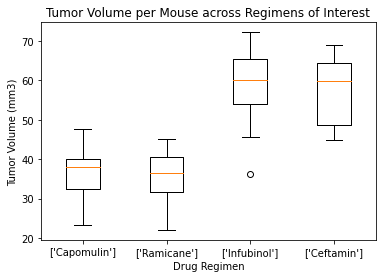

In [248]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

ax1.boxplot(Tumor_Values_List, labels=Regimen_Labels, widths = 0.4, vert=True)
ax1.set_title("Tumor Volume per Mouse across Regimens of Interest")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
plt.show()

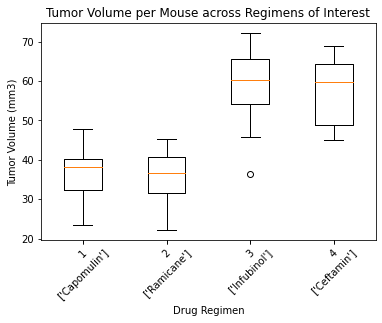

In [249]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest with matplotlib
chart = plt.figure()
plt.xlabel("Drug Regimen")
plt.xticks([1,2,3,4], Regimen_Labels, rotation=45)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume per Mouse across Regimens of Interest")
plt.boxplot(Tumor_Values_List)
plt.show()
    

In [250]:
## Line and Scatter Plots

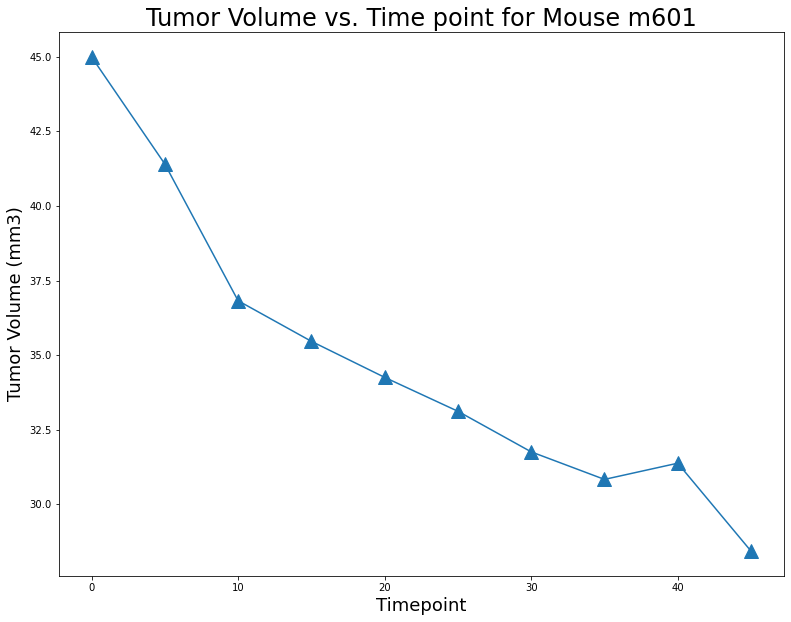

In [251]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with  
# m601
# Capomulin_Final

m601_Capomulin = Capomulin.loc[Capomulin['Mouse ID'] == 'm601', :]
m601_Capomulin

x_axis = (m601_Capomulin["Timepoint"])
y_axis = (m601_Capomulin["Tumor Volume (mm3)"])

fig1, ax1 = plt.subplots(figsize=(13,10))
plt.title("Tumor Volume vs. Time point for Mouse m601", fontsize = 24)
plt.xlabel("Timepoint", fontsize = 18)
plt.ylabel("Tumor Volume (mm3)", fontsize = 18)

plt.plot(x_axis, y_axis, marker="^", markersize = 14)



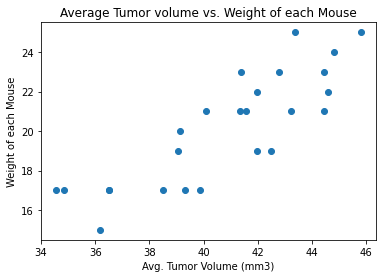

In [252]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
Avg_Tumor_Vol = Capomulin.groupby(["Mouse ID"]).mean()

x_axis = Avg_Tumor_Vol["Tumor Volume (mm3)"]
y_axis = Avg_Tumor_Vol["Weight (g)"]
plt.xlabel("Avg. Tumor Volume (mm3)")
plt.ylabel("Weight of each Mouse")
plt.title("Average Tumor volume vs. Weight of each Mouse")

plt.scatter(x_axis, y_axis)

## Correlation and Regression

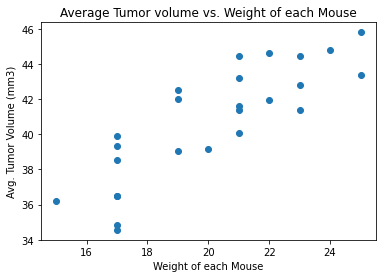

In [282]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
Avg_Tumor_Vol_Capomulin = Capomulin.groupby(["Mouse ID"]).mean()

y_axis = Avg_Tumor_Vol_Capomulin["Tumor Volume (mm3)"]
x_axis = Avg_Tumor_Vol_Capomulin["Weight (g)"]
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.xlabel("Weight of each Mouse")
plt.title("Average Tumor volume vs. Weight of each Mouse")

plt.scatter(x_axis, y_axis)

 The correlation between Average Tumor Volume (mm3) & Weight of each Mouse is 0.84
The value of slope: 0.9544396890241045
The value of intercept: 21.552160532685015
The value of rvalue (Correlation coefficient): 0.8419363424694718
The value of pandas (Correlation coefficient): 0.84
The value of stderr: 0.1275435903320134
y = 0.95x + 21.55
The R-Squared Value is 0.7088568047708717


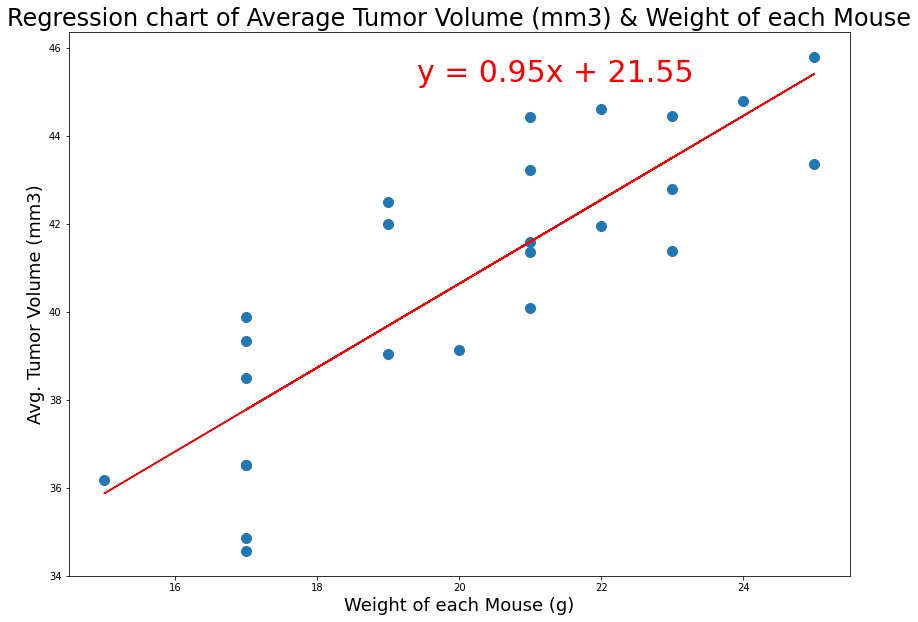

In [294]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(x_axis, y_axis)
correlation = round(correlation[0],2)

print(f" The correlation between Average Tumor Volume (mm3) & Weight of each Mouse is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The value of slope: {slope}")
print(f"The value of intercept: {intercept}")
print(f"The value of rvalue (Correlation coefficient): {rvalue}")
print(f"The value of pandas (Correlation coefficient): {correlation}")
print(f"The value of stderr: {stderr}")

equation_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)

# for mouse weight and average tumor volume for the Capomulin 
# model = st.linregress(y_axis, x_axis)
# model 
# (other method)

fig1, ax1 = plt.subplots(figsize=(14,10))
y_axis_line = x_axis*slope+intercept
plt.scatter(x_axis, y_axis,s=100)
plt.plot(x_axis,y_axis_line, color='red')
plt.title("Regression chart of Average Tumor Volume (mm3) & Weight of each Mouse", fontsize=24)
plt.ylabel("Avg. Tumor Volume (mm3)", fontsize=18)
plt.xlabel("Weight of each Mouse (g)", fontsize=18)

# for equation representation on the chart
ax1.annotate(equation_line, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

R_squared_value = rvalue**2

print(f"The R-Squared Value is {R_squared_value}")
